In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from bson import Code
import pandas as pd
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)

In [2]:
def find_all_keys(collection):
    def find_keys_in_doc(doc):
        found_keys = []
        append = found_keys.append

        for k,v in doc.items():
            if type(v) is dict:
                found_keys += find_keys_in_doc(v)
            else:
                append(k)

        return found_keys

    all_keys = []

    for doc in collection:
        all_keys += find_keys_in_doc(doc)

    return sorted(set(all_keys))

In [3]:
client = MongoClient('localhost', 27018)
db = client['retrosheet']
# table = db['testcoll']

In [4]:
collections = db.list_collection_names()

In [5]:
bos2018 = list(db.c_2018BOS.find())

In [6]:
k = set([])
for entry in bos2018:
    k.update(entry.keys())

What goes in my dataframe:
What does each row represent? One Game
What are the feaures of a game?
game_id, date, number, daynight, usedh, umphome, ump1b, ump2b, ump3b, temp, winddr, windspeed, sky, visteam, hometeam, site, timeofgame, attendance  

In [9]:
game_meta_cols = ["game_id", "date", "number", "daynight", "usedh", "umphome", 
                  "ump1b", "ump2b", "ump3b", "temp", "winddr", "windspeed",
                  "sky", "visteam", "hometeam", "site", "timeofgame",
                  "attendance"]

In [21]:
info_keys = set([])
for e in list(db['c_2018BOS'].find({"entry_type": "info"})):
    info_keys.update(e.keys())

DF from dict:
Only keep where entry type == info


In [37]:
bos_info = list(db['c_2018BOS'].find({"entry_type": "info"}))

# split by game: List -> List -> game_dict

In [51]:
game_ids = []
for item in bos_info:
#     print(item['game_id'])
    game_ids.append(item['game_id'])
game_ids = set(game_ids)

In [54]:
# for compressing a into single game
grouped_by_game = []
for id in game_ids:
    game = {}
    for item in bos_info:
        if item["game_id"] == id:
            game.update(item)
    grouped_by_game.append(game)

In [80]:
df = pd.DataFrame(grouped_by_game)

In [81]:
# attendance int, number int, temp int, timeofgame int, windspeed int: date date, starttime dataetime, 
for col in ['attendance', 'number', 'temp', 'timeofgame', 'windspeed']:
    df[col] = pd.to_numeric(df[col])

In [88]:
# df['date_time'] = 
df['date_time'] = pd.to_datetime(df['date'] + " " + df['starttime'])

In [97]:
df.columns

Index(['_id', 'attendance', 'date', 'daynight', 'entry_type', 'fieldcond',
       'game_id', 'hometeam', 'howscored', 'lp', 'number', 'oscorer',
       'pitches', 'precip', 'save', 'site', 'sky', 'starttime', 'temp',
       'timeofgame', 'ump1b', 'ump2b', 'ump3b', 'umphome', 'usedh', 'visteam',
       'winddir', 'windspeed', 'wp', 'date_time'],
      dtype='object')

In [110]:
num_cols = ['attendance', 'number', 'temp', 'timeofgame', 'windspeed']
cat_cols = ['_id', 'daynight', 'entry_type', 'fieldcond',
       'game_id', 'hometeam', 'howscored', 'lp', 'oscorer',
       'pitches', 'precip', 'save', 'site', 'sky',
       'ump1b', 'ump2b', 'ump3b', 'umphome', 'usedh', 'visteam',
       'winddir', 'wp',]
date_cols = [ 'date',  'date_time', 'starttime']

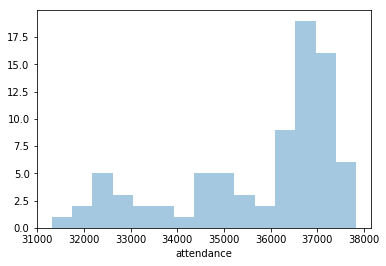

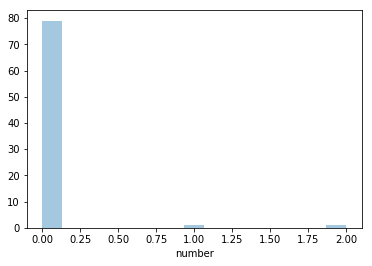

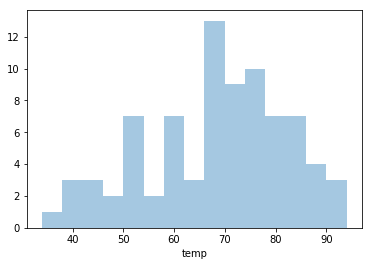

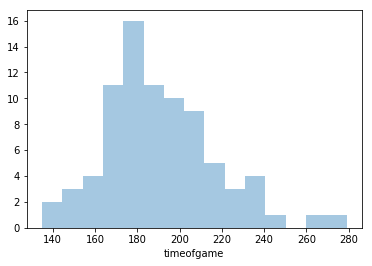

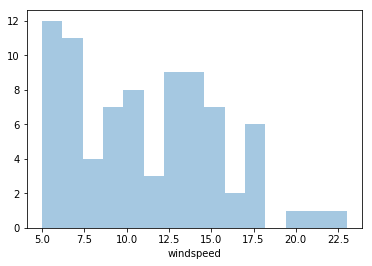

In [109]:
for col in num_cols:
    plt.figure()
    sns.distplot(df[col], kde=False, bins=15)

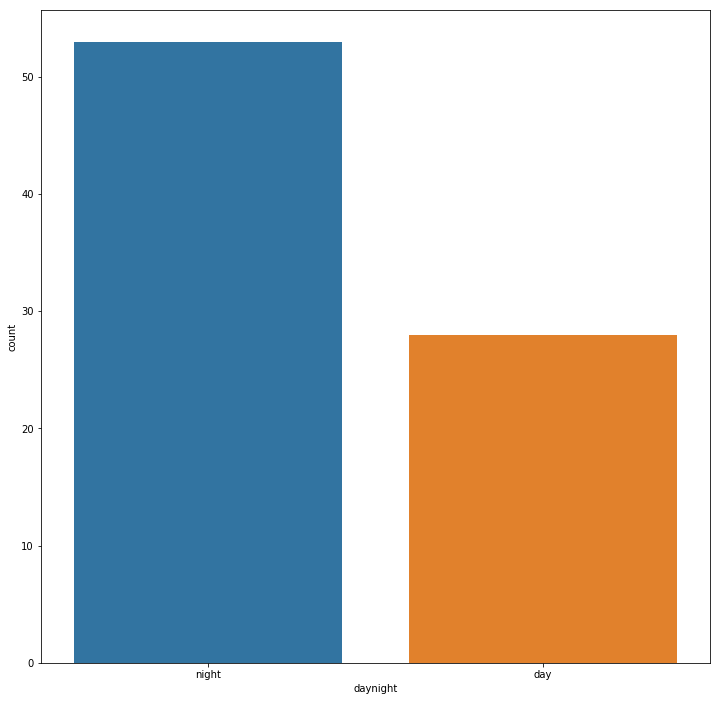

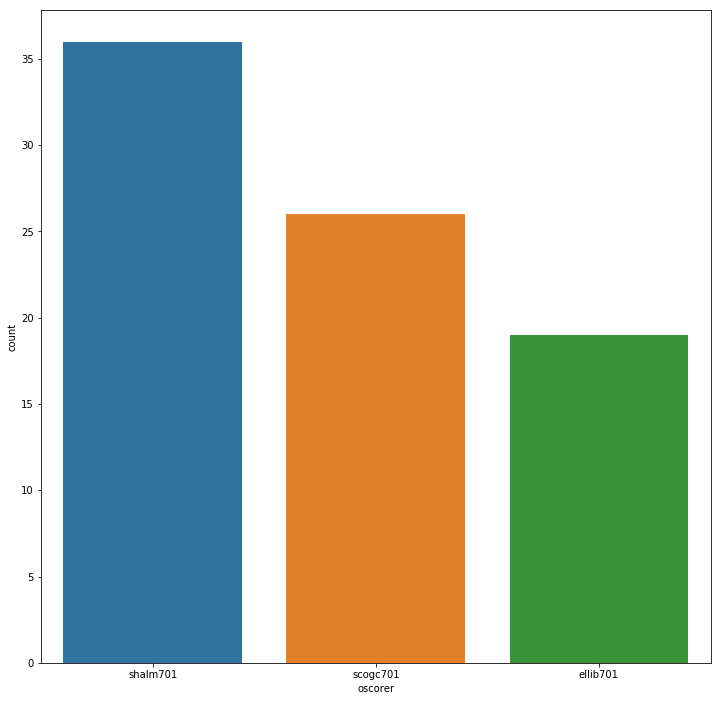

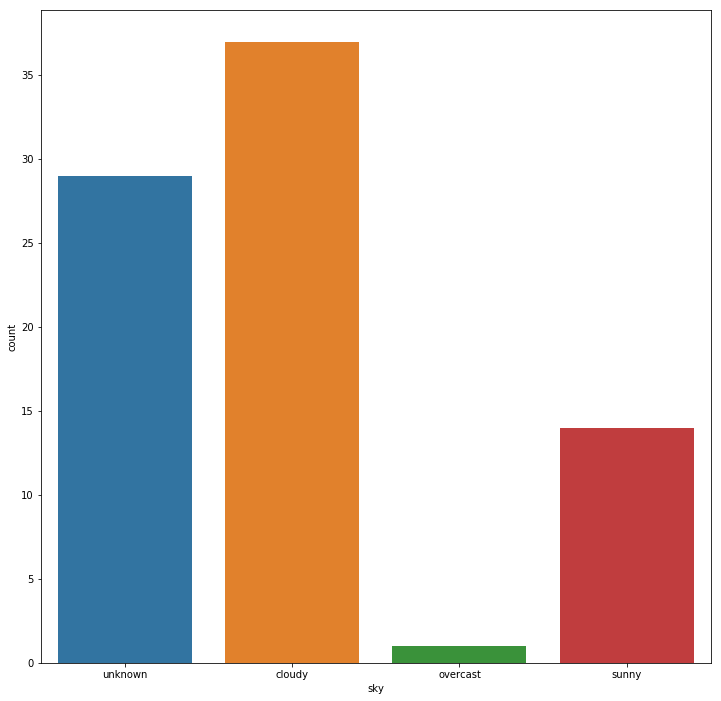

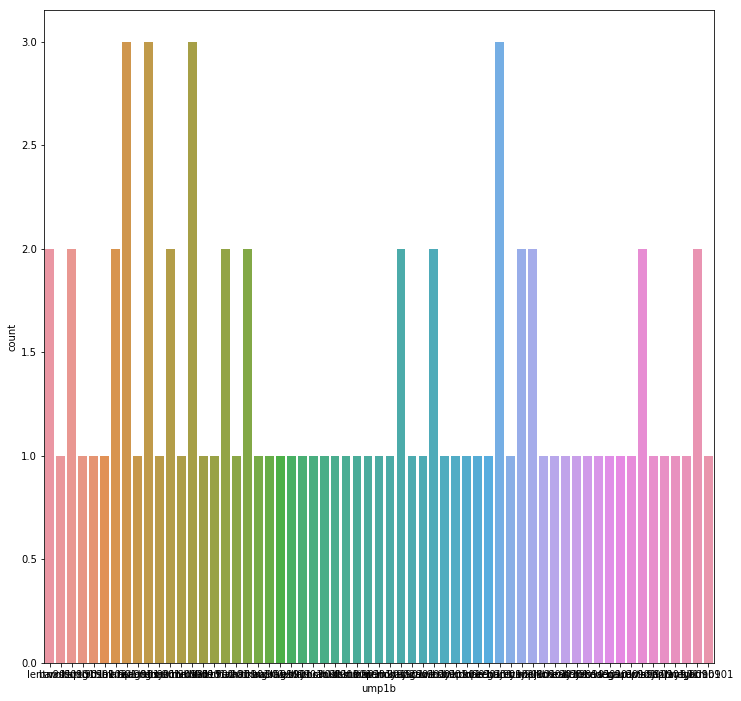

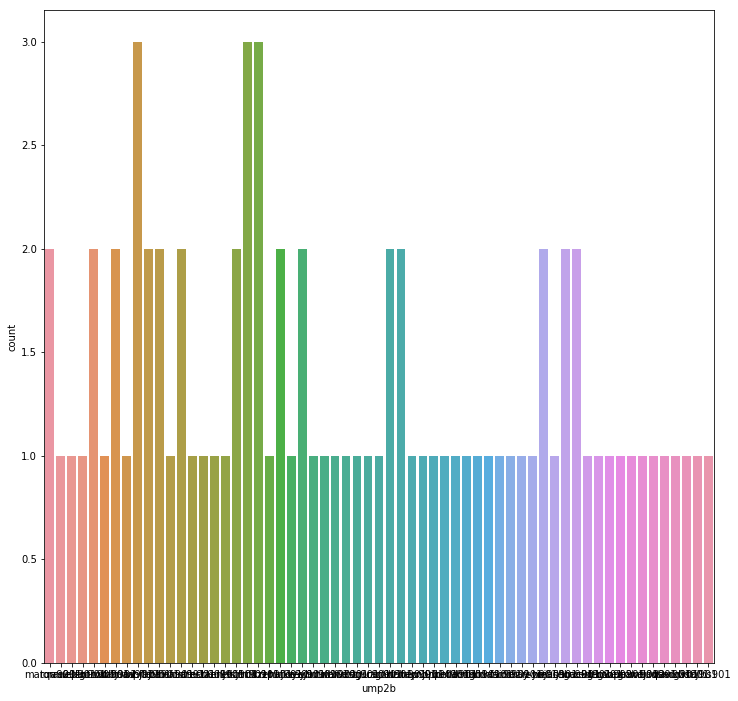

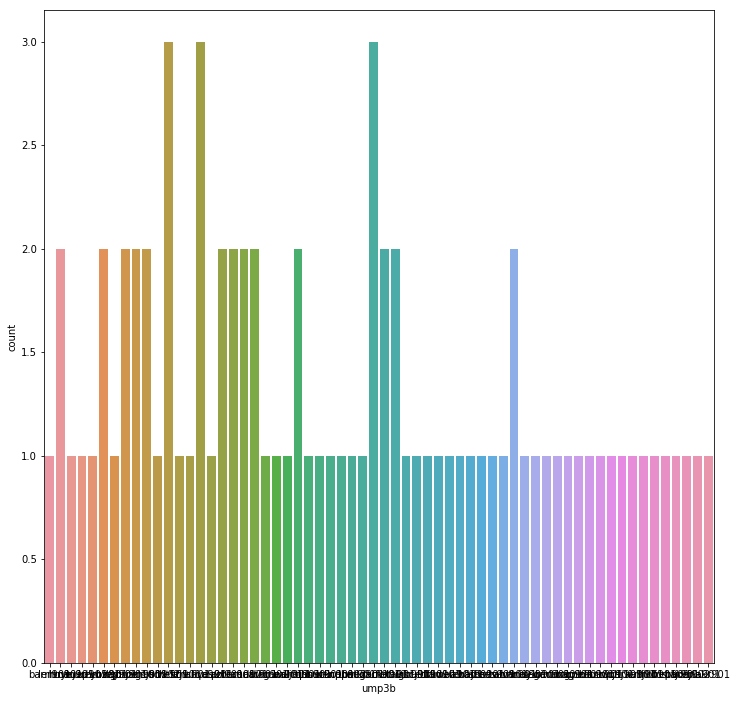

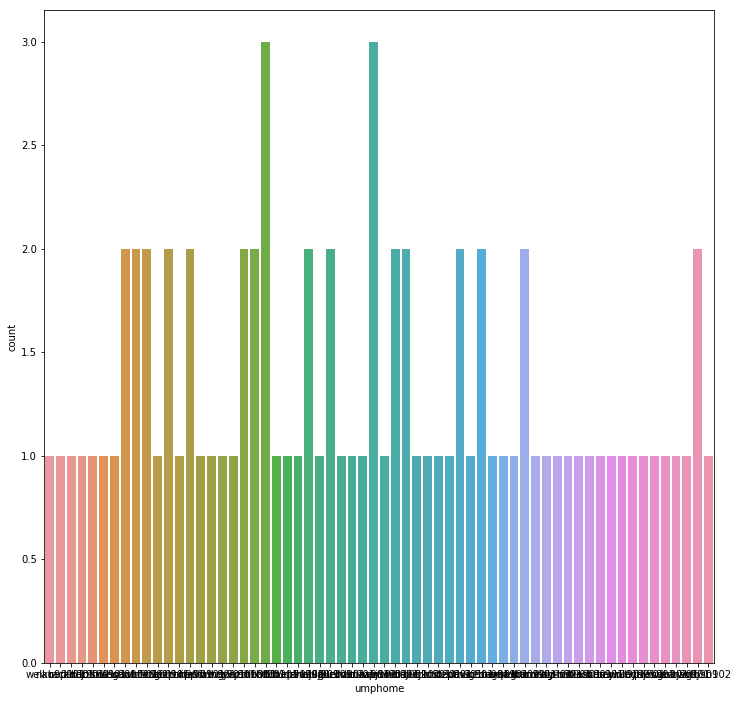

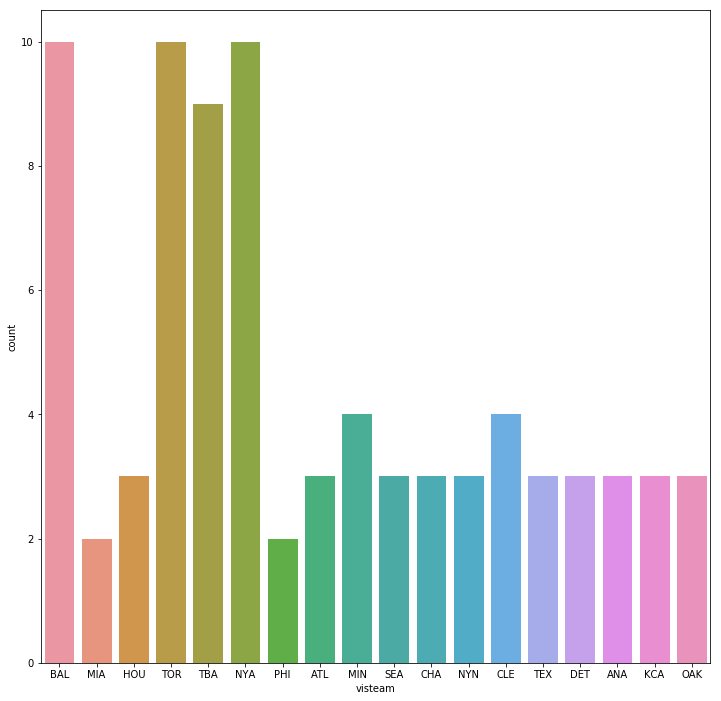

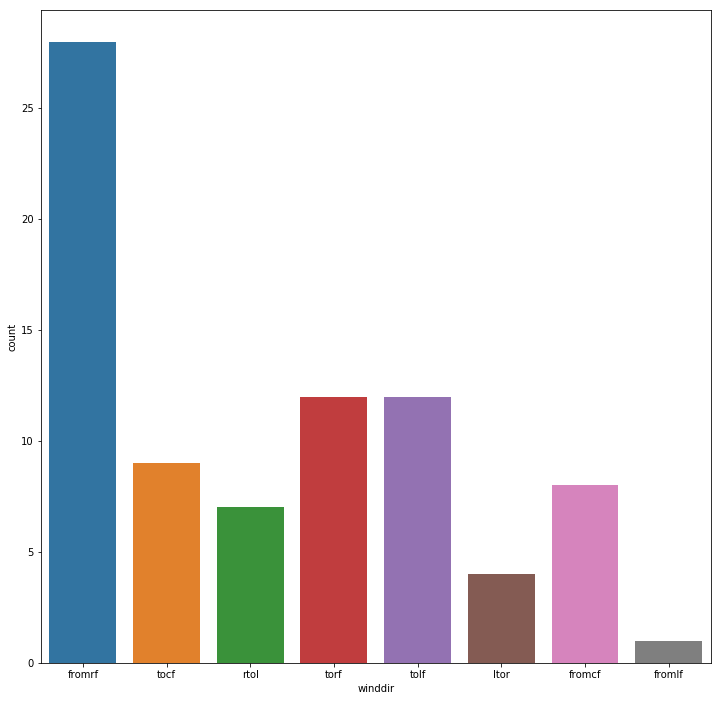

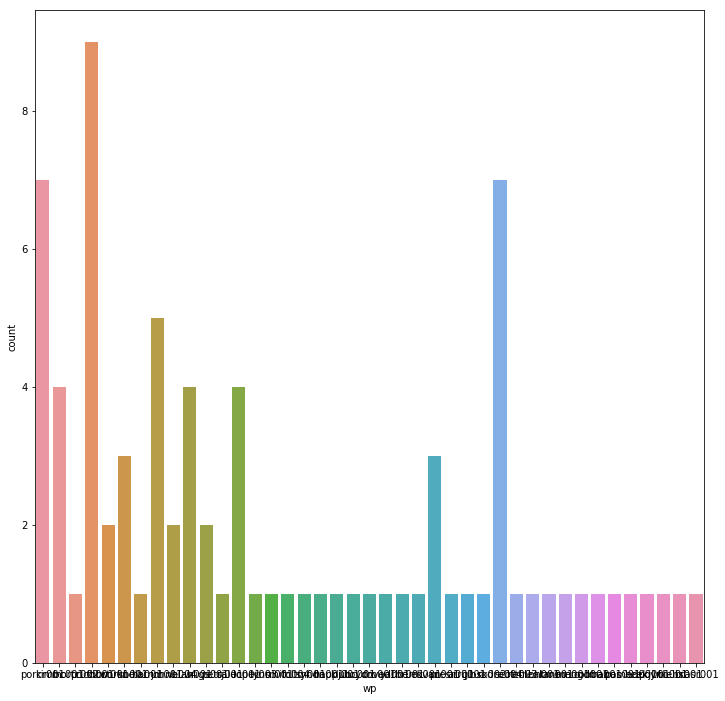

In [120]:
cols = ['daynight', 'oscorer', 'sky', 'ump1b', 'ump2b', 'ump3b', 'umphome', 'visteam',
       'winddir', 'wp',]
for col in cols:
    plt.figure(figsize=(12,12))
    sns.countplot(df[col])